In [2]:
import pandas as pd
import numpy as np
import glob
import itertools
import matplotlib.pyplot as plt 

In [3]:
#### Merging 12 months into a single file 

#specifying folder path
path = "C:/Users/minhh/Documents/Python Project/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data"

#get csv file in the path 
files = glob.glob(path + "/*.csv")
print(files)

['C:/Users/minhh/Documents/Python Project/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\\Sales_April_2019.csv', 'C:/Users/minhh/Documents/Python Project/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\\Sales_August_2019.csv', 'C:/Users/minhh/Documents/Python Project/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\\Sales_December_2019.csv', 'C:/Users/minhh/Documents/Python Project/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\\Sales_February_2019.csv', 'C:/Users/minhh/Documents/Python Project/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\\Sales_January_2019.csv', 'C:/Users/minhh/Documents/Python Project/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\\Sales_July_2019.csv', 'C:/Users/minhh/Documents/Python Project/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\\Sales_June_2019.csv', 'C:/Users/minhh/Documents/Python Project/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\\Sales_March_2019.csv', 'C:/User

In [4]:
#get an empty list to store data 
content = [] 

#append data 
for filename in files:
    df= pd.read_csv(filename, index_col = None, header=0) 
    content.append(df) 

#convert content into data frame 
df_sales = pd.concat(content).dropna(how = "all")
df_sales = df_sales[df_sales['Order ID'] != 'Order ID']
df_sales["Order Date"] = pd.to_datetime(df_sales["Order Date"])
df_sales = df_sales.astype({'Quantity Ordered':'int','Price Each':'float',})
df_sales.info()
print(df_sales.head())

C:\Users\minhh\AppData\Local\Temp\ipykernel_18916\3449766015.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sales["Order Date"] = pd.to_datetime(df_sales["Order Date"])


<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB
  Order ID                     Product  Quantity Ordered  Price Each   
0   176558        USB-C Charging Cable                 2       11.95  \
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561     

#### Question 1: What was the best month for sales? How much was earned that month?

  Order ID                     Product  Quantity Ordered  Price Each   
0   176558        USB-C Charging Cable                 2       11.95  \
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  month  revenue  
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4    23.90  
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4    99.99  
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   600.00  
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4    11.99  
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4    11.99  


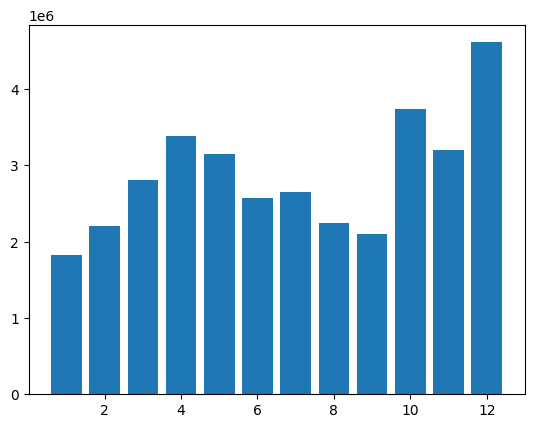

Best month for sales is: 12


In [4]:
#add month and revenue column
df_sales["month"] = df_sales["Order Date"].dt.month
df_sales["revenue"] = df_sales["Quantity Ordered"] * df_sales["Price Each"]
print(df_sales.head())


#group revenue by month 
sales_by_month = df_sales.groupby('month').agg({'revenue':'sum'}).reset_index()
plt.bar( x = 'month', height = 'revenue', data = sales_by_month)
plt.show()
best_month_for_sales = sales_by_month['month'][sales_by_month['revenue'].idxmax()]
print('Best month for sales is: ' + str(best_month_for_sales))

#### Question 2: What city had the highest number of sales?

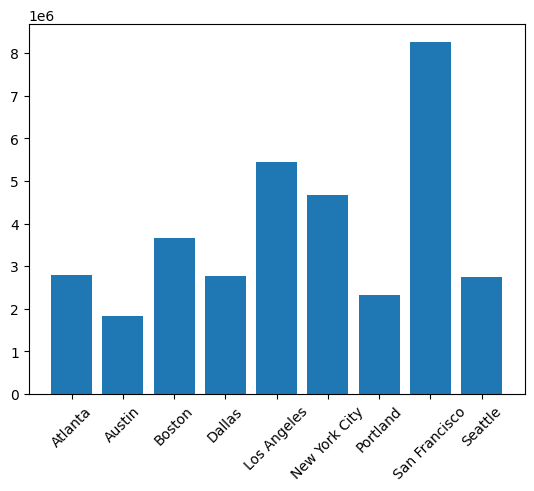

Best city for sales: San Francisco


In [5]:
#add a city column
def get_city(x):
    return x.split(',')[1].strip()
df_sales['city'] = df_sales['Purchase Address'].apply(get_city)

#group revenue by city
sales_by_city = df_sales.groupby('city').agg({'revenue':sum}).reset_index()
plt.bar(x = 'city', height = 'revenue', data = sales_by_city) 
plt.xticks(rotation = 45)
plt.show()
best_city_for_sales = sales_by_city['city'][sales_by_city['revenue'].idxmax()]
print('Best city for sales: ' + str(best_city_for_sales))

#### Question 3: What time should we display advertisements to maximize the likelihood of purchases?

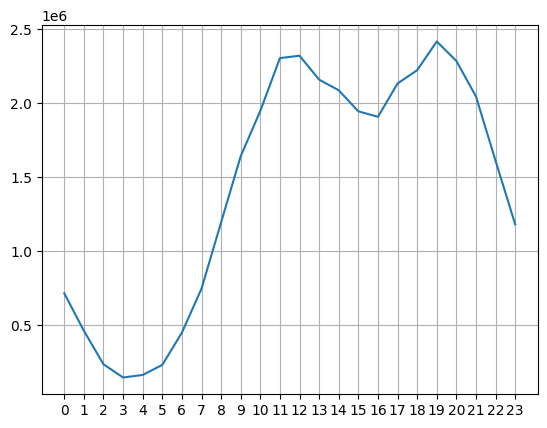

Best time for display advertisements is from 11:00 to 19:00


In [6]:
#add a hour column 
df_sales['hour'] = df_sales['Order Date'].dt.hour
sales_by_hour = df_sales.groupby('hour').agg({'revenue':sum}).reset_index()
plt.plot(sales_by_hour['hour'], sales_by_hour['revenue'])
x = np.arange(0,24,1)
plt.xticks(x)
plt.grid()
plt.show()
best_time_for_display = sales_by_hour['hour'][sales_by_hour['revenue'].idxmax()]
print('Best time for display advertisements is from 11:00 to 19:00')

#### Question 4: What products are most often sold together?

In [7]:
# Create a df with only order have more than 2 product
df_sales_order_duplicated = df_sales[['Order ID','Product']][df_sales.duplicated(subset = 'Order ID', keep = False)].reset_index(drop = True).sort_values(['Order ID','Product'])
# Group by order and generate all combination of product 
group_name = []
for order_id, product in df_sales_order_duplicated.groupby('Order ID')['Product']:
    combinations = itertools.combinations(product,2)
    for comb in combinations:
        group_name.append((order_id, comb[0], comb[1]))

#create a new df with combination name
df_group_name = pd.DataFrame(group_name, columns = ['Order ID','Product 1','Product 2'])

#concat product 1 and product 2 into the same column 
products_combine_df = pd.DataFrame([])
products_combine_df['2 products'] = df_group_name['Product 1'] + ", " + df_group_name['Product 2']
products_combine_count = products_combine_df.value_counts().reset_index(name='Counts')
print(products_combine_count.sort_values('Counts', ascending = False))

                                       2 products  Counts
0                Lightning Charging Cable, iPhone    1015
1              Google Phone, USB-C Charging Cable     999
2                        Wired Headphones, iPhone     462
3                  Google Phone, Wired Headphones     423
4                Apple Airpods Headphones, iPhone     373
..                                            ...     ...
167          27in FHD Monitor, LG Washing Machine       1
165                       Flatscreen TV, LG Dryer       1
164    34in Ultrawide Monitor, LG Washing Machine       1
163  Apple Airpods Headphones, LG Washing Machine       1
174     AA Batteries (4-pack), LG Washing Machine       1

[175 rows x 2 columns]


#### Question 5: What product sold the most? Why do you think it did?

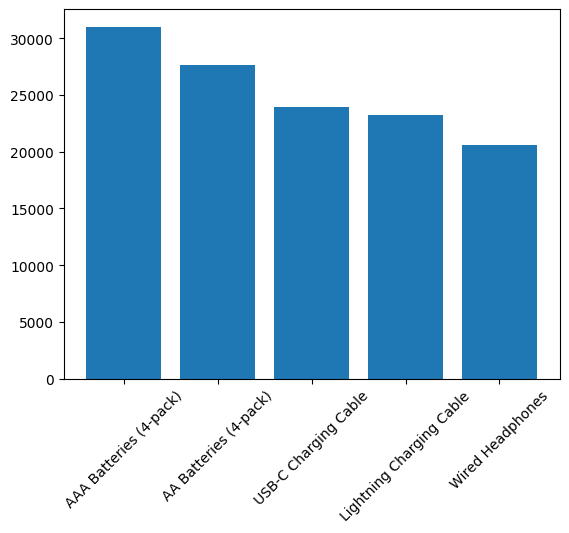

In [13]:
quantity_by_product = df_sales[['Product','Quantity Ordered']].groupby('Product').sum('Quantity Ordered').sort_values('Quantity Ordered', ascending = False).reset_index()
plt.bar(x = 'Product', height = 'Quantity Ordered', data = quantity_by_product.head())
plt.xticks(rotation = 45)
plt.show()

                      Product  Quantity Ordered  Price Each
9      27in 4K Gaming Monitor              6244      389.99
8                      iPhone              6849      700.00
7            27in FHD Monitor              7550      149.99
6  Bose SoundSport Headphones             13457       99.99
5    Apple Airpods Headphones             15661      150.00
4            Wired Headphones             20557       11.99
3    Lightning Charging Cable             23217       14.95
2        USB-C Charging Cable             23975       11.95
1       AA Batteries (4-pack)             27635        3.84
0      AAA Batteries (4-pack)             31017        2.99


C:\Users\minhh\AppData\Local\Temp\ipykernel_27552\2799932568.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(quantity_price['Product'],rotation = 90)


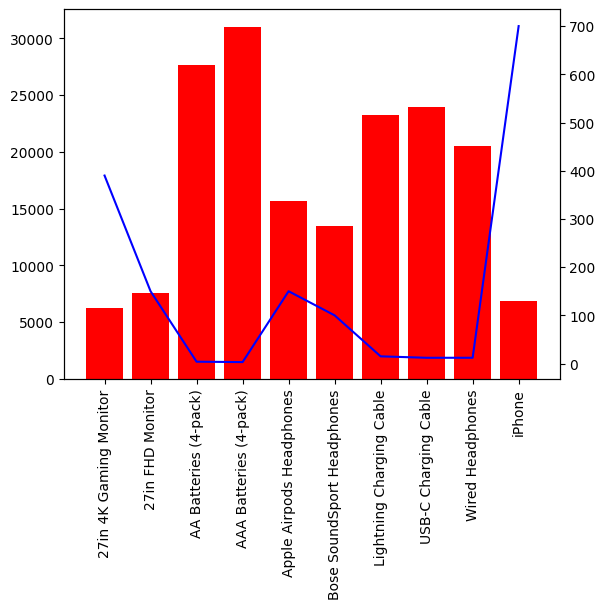

In [62]:
quantity_price = quantity_by_product.merge(df_sales[['Product','Price Each']], on = 'Product', how = 'left')
quantity_price = quantity_price.drop_duplicates().reset_index(drop=True).head(10).sort_values('Product', ascending = True)
print(quantity_price.sort_values('Quantity Ordered'))
fig, ax1 = plt.subplots()

#plot the 1st plot
ax2 = ax1.twinx()
ax1.bar(quantity_price['Product'],quantity_price['Quantity Ordered'], color = 'red')
ax2.plot(quantity_price['Product'],quantity_price['Price Each'],color = 'blue')

ax1.set_xlabel = 'Product Name' 
ax1.set_ylabel = ('Quantity') 
ax2.set_ylabel = ('Price') 
ax1.set_xticklabels(quantity_price['Product'],rotation = 90)

plt.show()